In [28]:
import fiona

import geopandas as gpd
import geodatasets

import matplotlib.pyplot as plt

from learntools.core import binder
binder.bind(globals())
#from learntools.geospatial.ex1 import *

In [19]:

# ✅ Updated local path for your machine
#world_loans = gpd.read_file(r"H:\code\geo\geospatial_analysis\geodata\kiva_loans\kiva_loans.shp")

#from learntools.geospatial.ex1 import *

In [20]:
loans_filepath = "../geodata/geospatial_db/kiva_loans/kiva_loans/kiva_loans.shp"

# Your code here: Load the data
world_loans = gpd.read_file(loans_filepath)

# Uncomment to view the first five rows of the data
world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.0287)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.0287)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


In [21]:
# This dataset is provided in GeoPandas
world_filepath = geodatasets.get_path('naturalearth.land')
world = gpd.read_file(world_filepath)

#world = gpd.read_file(geodatasets.get_path("naturalearth_countries"))

world.head()

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."


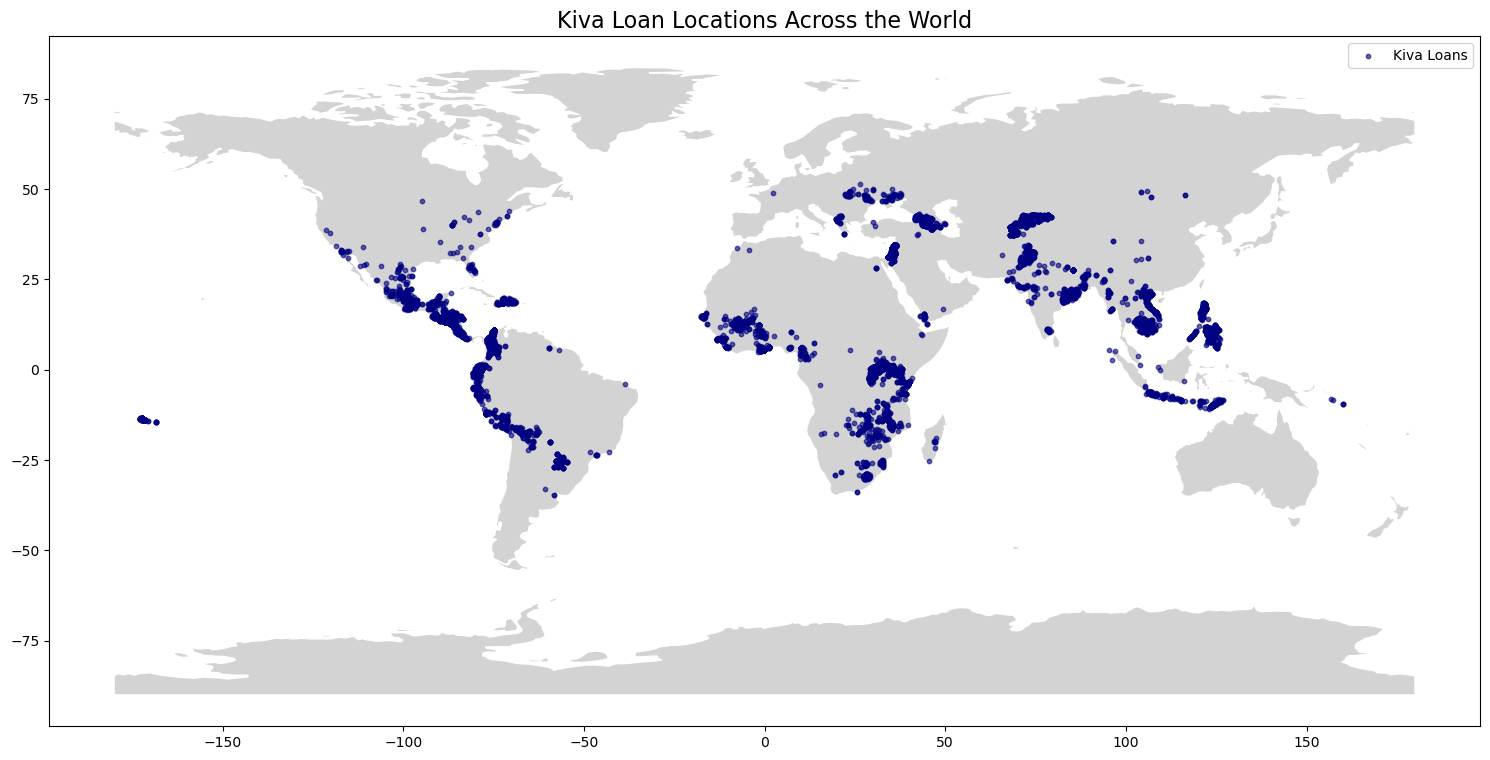

In [25]:


# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the world base map with light gray fill
world.plot(ax=ax, color='lightgray', edgecolor='white')

# Plot Kiva loan locations as red points
world_loans.plot(ax=ax, color='navy', markersize=10, label='Kiva Loans', alpha=0.6)

# Add title and legend
ax.set_title('Kiva Loan Locations Across the World', fontsize=16)
ax.legend()

plt.tight_layout()
plt.show()


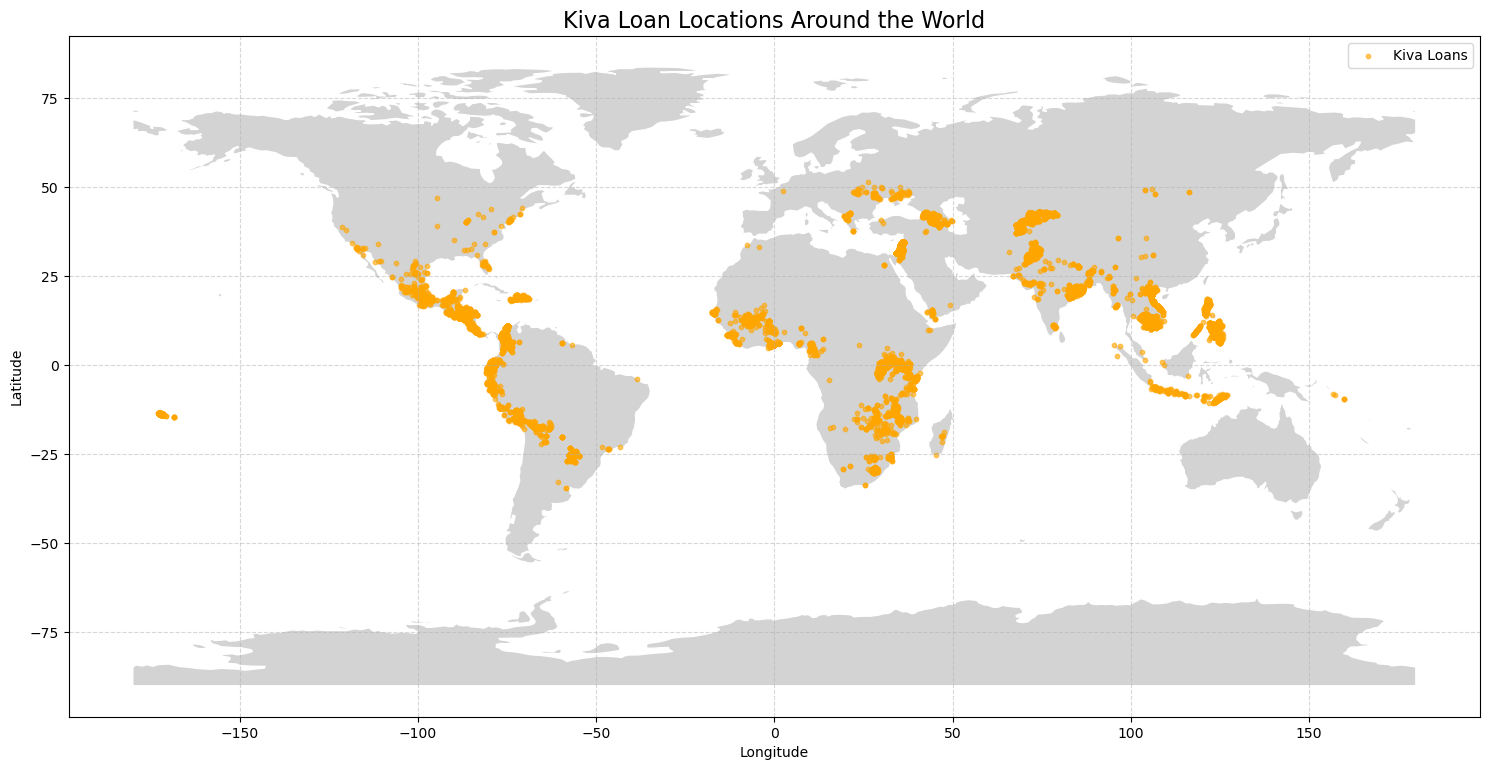

In [24]:
# Your code here

# Set up figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the world base map
world.plot(ax=ax, color='lightgray', edgecolor='white')

# Plot the Kiva loan locations (assumes world_loans contains point geometries)
world_loans.plot(ax=ax, markersize=10, color='orange', alpha=0.6, label='Kiva Loans')

# Add title and legend
ax.set_title('Kiva Loan Locations Around the World', fontsize=16)
ax.legend()

# Optional: Add axes labels or grid
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



3) Select loans based in the Philippines.¶
Next, you'll focus on loans that are based in the Philippines. Use the next code cell to create a GeoDataFrame PHL_loans which contains all rows from world_loans with loans that are based in the Philippines.

In [26]:
PHL_loans = world_loans[world_loans['country'] == 'Philippines']
PHL_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
2859,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.73961 17.64228)
2860,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.74169 17.63235)
2861,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.46667 16.6)
2862,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,6050,POINT (121.73333 17.83333)
2863,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,625,POINT (121.518 16.72368)


4) Understand loans in the Philippines.
Run the next code cell without changes to load a GeoDataFrame PHL containing boundaries for all islands in the Philippines.

In [31]:
PHL = gpd.read_file("../geodata/geospatial_db/Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,...,locname,offname,boundary,adminlevel,wikidata,wikimedia,note,rpath,ISO3166_2,geometry
0,Autonomous Region in Muslim Mindanao,None,2018-10-17 07:14:53,NaT,NaT,None,-1,0,-1,NaN,...,Autonomous Region in Muslim Mindanao,None,administrative,3,Q13708,en:Autonomous Region in Muslim Mindanao,None,"3821409,443174,0",PH-14,"MULTIPOLYGON (((119.4669 4.58718, 119.46653 4...."
1,Bicol Region,None,2018-10-17 07:14:53,NaT,NaT,None,-1,0,-1,NaN,...,Bicol,None,administrative,3,Q13662,en:Bicol Region,None,"3561455,443174,0",PH-05,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,None,2018-10-17 07:14:53,NaT,NaT,None,-1,0,-1,NaN,...,Cagayan Valley,None,administrative,3,Q13615,None,None,"1552192,443174,0",PH-02,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,None,2018-10-17 07:14:53,NaT,NaT,None,-1,0,-1,NaN,...,Calabarzon,None,administrative,3,Q13650,en:Calabarzon,None,"1552120,443174,0",PH-40,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,None,2018-10-17 07:14:53,NaT,NaT,None,-1,0,-1,NaN,...,Caraga,None,administrative,3,Q13704,None,None,"3870502,443174,0",PH-13,"MULTIPOLYGON (((126.45401 8.244, 126.45407 8.2..."


In [32]:
# Load a KML file containing island boundaries
#gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("../geodata/geospatial_db/Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,...,locname,offname,boundary,adminlevel,wikidata,wikimedia,note,rpath,ISO3166_2,geometry
0,Autonomous Region in Muslim Mindanao,None,2018-10-17 07:14:53,NaT,NaT,None,-1,0,-1,NaN,...,Autonomous Region in Muslim Mindanao,None,administrative,3,Q13708,en:Autonomous Region in Muslim Mindanao,None,"3821409,443174,0",PH-14,"MULTIPOLYGON (((119.4669 4.58718, 119.46653 4...."
1,Bicol Region,None,2018-10-17 07:14:53,NaT,NaT,None,-1,0,-1,NaN,...,Bicol,None,administrative,3,Q13662,en:Bicol Region,None,"3561455,443174,0",PH-05,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,None,2018-10-17 07:14:53,NaT,NaT,None,-1,0,-1,NaN,...,Cagayan Valley,None,administrative,3,Q13615,None,None,"1552192,443174,0",PH-02,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,None,2018-10-17 07:14:53,NaT,NaT,None,-1,0,-1,NaN,...,Calabarzon,None,administrative,3,Q13650,en:Calabarzon,None,"1552120,443174,0",PH-40,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,None,2018-10-17 07:14:53,NaT,NaT,None,-1,0,-1,NaN,...,Caraga,None,administrative,3,Q13704,None,None,"3870502,443174,0",PH-13,"MULTIPOLYGON (((126.45401 8.244, 126.45407 8.2..."


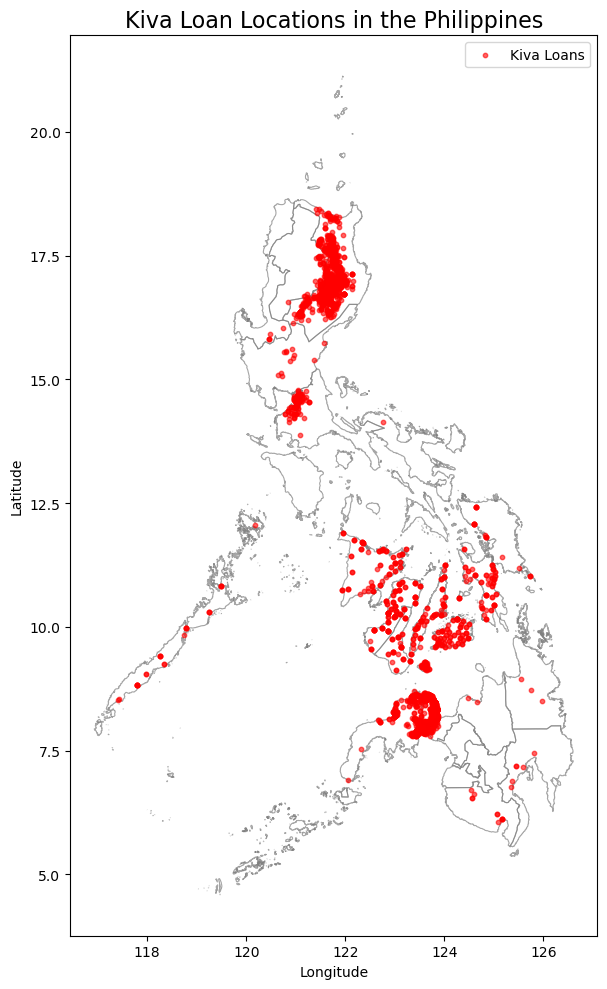

In [34]:
fig, ax = plt.subplots(figsize=(12, 10))

# Plot Philippine regions
PHL.plot(ax=ax, color='none', edgecolor='gray', linewidth=0.8, alpha=0.7)

# Plot loan locations
PHL_loans.plot(ax=ax, color='red', markersize=10, alpha=0.6, label='Kiva Loans')

ax.set_title('Kiva Loan Locations in the Philippines', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
plt.tight_layout()
plt.show()

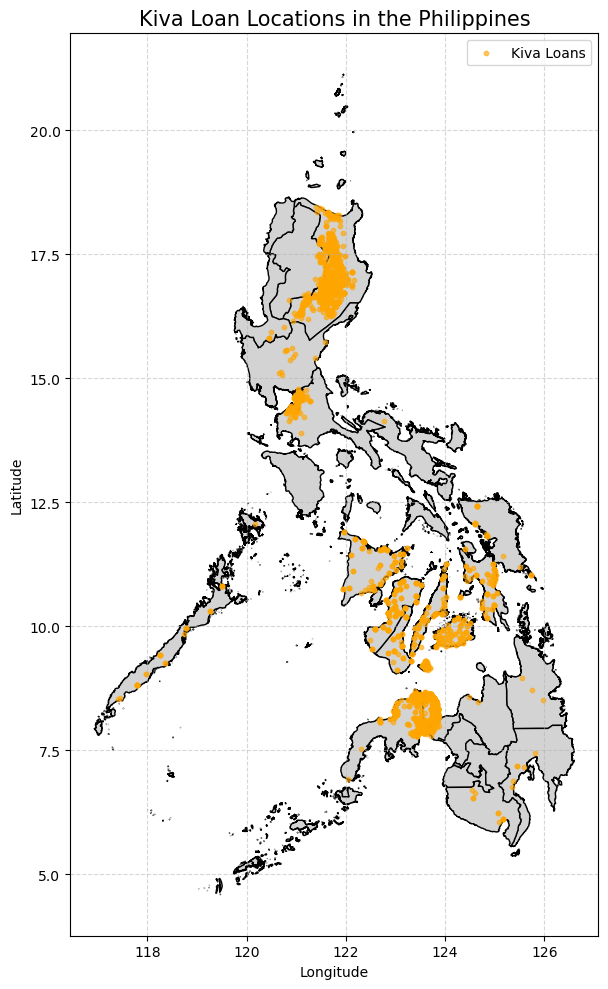

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the Philippines boundary
PHL.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the loan locations
PHL_loans.plot(ax=ax, color='orange', markersize=10, alpha=0.6, label='Kiva Loans')

# Add title and legend
ax.set_title('Kiva Loan Locations in the Philippines', fontsize=15)
ax.legend()

# Optional: add coordinate grid
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Islands with no Kiva loans (high opportunity): []


C:\Users\Mehrima\AppData\Local\Temp\ipykernel_10000\1390010282.py:36: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


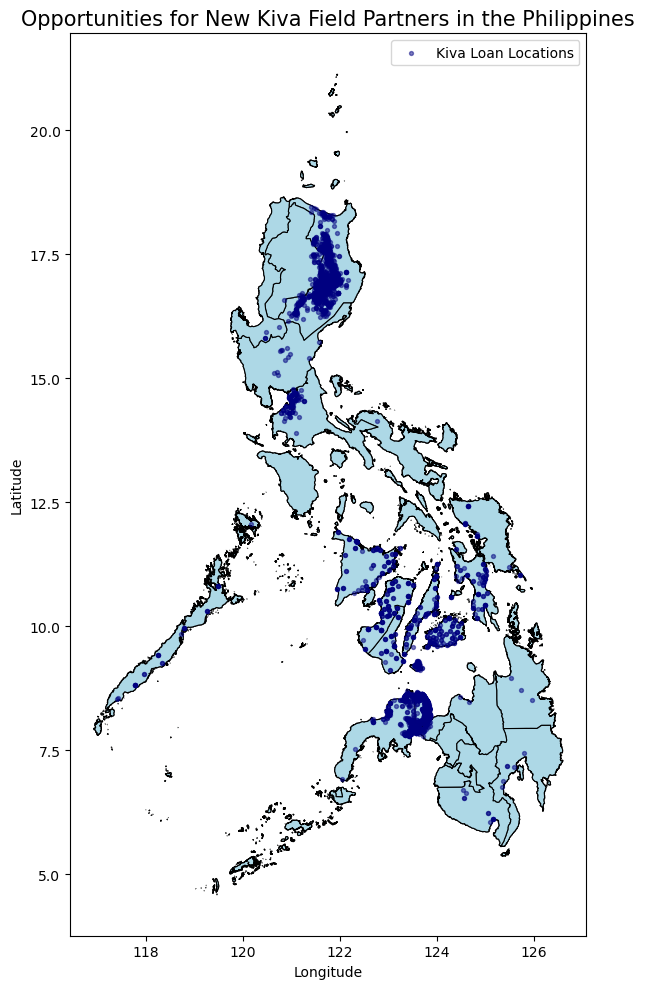

In [41]:
# Count the number of loans per island/region in the Philippines
PHL_loans_per_island = gpd.sjoin(PHL, PHL_loans, how='left', predicate='contains')
loan_counts = PHL_loans_per_island.groupby('Name').size().reindex(PHL['Name']).fillna(0)

# Add loan counts to the PHL GeoDataFrame
PHL['loan_count'] = loan_counts.values

# Define opportunity: islands with zero loans are high opportunity
PHL['opportunity'] = PHL['loan_count'] == 0

# List islands with zero loans (high opportunity for new Field Partners)
islands_no_loans = PHL.loc[PHL['loan_count'] == 0, 'Name'].tolist()

print("Islands with no Kiva loans (high opportunity):", islands_no_loans)

# Plot the map
fig, ax = plt.subplots(figsize=(12, 10))
PHL.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.8)

# Highlight islands with no loans
if not PHL[PHL['opportunity']].empty:
    PHL[PHL['opportunity']].plot(ax=ax, color='gold', edgecolor='red', linewidth=2, label='High Opportunity')

# Plot islands with loans
PHL[~PHL['opportunity']].plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.8, label='Existing Kiva Loans')

# Plot loan locations
PHL_loans.plot(ax=ax, color='navy', markersize=8, alpha=0.5, label='Kiva Loan Locations')

# Annotate island names with no loans
for idx, row in PHL[PHL['opportunity']].iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(row['Name'], (centroid.x, centroid.y), fontsize=10, color='red', ha='center')

ax.set_title('Opportunities for New Kiva Field Partners in the Philippines', fontsize=15)
ax.legend()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.tight_layout()
plt.show()

C:\Users\Mehrima\AppData\Local\Temp\ipykernel_10000\1167117771.py:22: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
C:\Users\Mehrima\AppData\Local\Temp\ipykernel_10000\1167117771.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


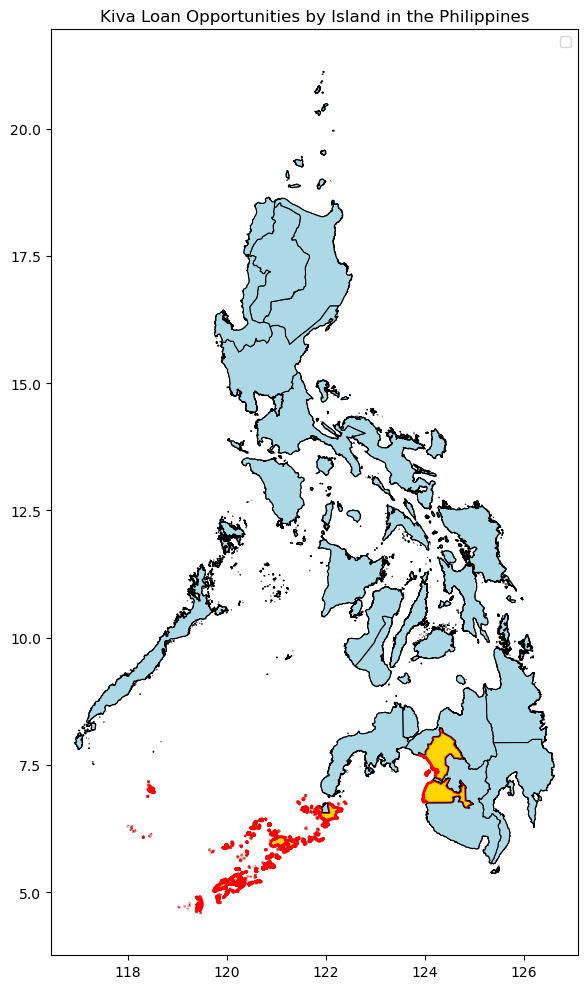

In [36]:
# Fix CRS issue
PHL_loans = PHL_loans.set_crs(PHL.crs)

# Spatial join
PHL_loans_per_island = gpd.sjoin(PHL, PHL_loans, how='left', predicate='contains')

# Identify islands with no loans
PHL['opportunity'] = ~PHL.index.isin(PHL_loans_per_island.dropna(subset=['index_right']).index)

# Plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 10))

PHL.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.8)

if not PHL[PHL['opportunity']].empty:
    PHL[PHL['opportunity']].plot(ax=ax, color='gold', edgecolor='red', linewidth=2, label='High Opportunity')

if not PHL[~PHL['opportunity']].empty:
    PHL[~PHL['opportunity']].plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.8, label='Existing Kiva Loans')

ax.legend()
ax.set_title("Kiva Loan Opportunities by Island in the Philippines")
plt.tight_layout()
plt.show()


C:\Users\Mehrima\AppData\Local\Temp\ipykernel_10000\3210028024.py:35: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
C:\Users\Mehrima\AppData\Local\Temp\ipykernel_10000\3210028024.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


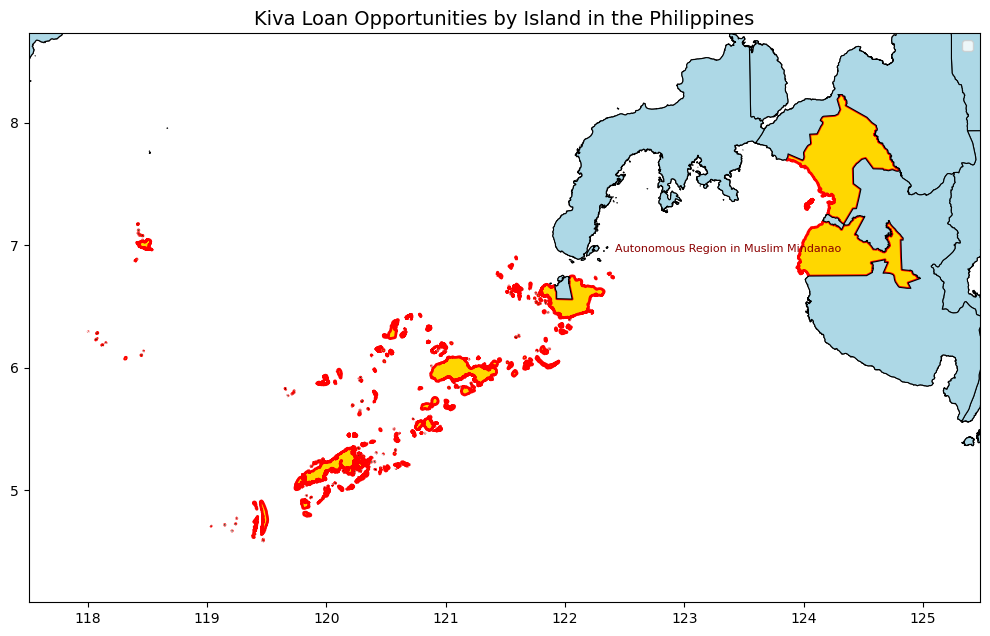

In [40]:
import matplotlib.pyplot as plt

# Filter high-opportunity and existing-loan islands
opportunity_islands = PHL[PHL['opportunity']]
covered_islands = PHL[~PHL['opportunity']]

# Create plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot base layer
PHL.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.8)

# Plot high-opportunity islands
if not opportunity_islands.empty:
    opportunity_islands.plot(ax=ax, color='gold', edgecolor='red', linewidth=2, label='High Opportunity')

    # ✅ Add labels for high-opportunity islands
    for idx, row in opportunity_islands.iterrows():
        if row.geometry.centroid.is_empty:
            continue
        x, y = row.geometry.centroid.coords[0]
        ax.text(x, y, str(row.get('Name', '')), fontsize=8, color='darkred', ha='center')

# Plot existing loan islands
if not covered_islands.empty:
    covered_islands.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.8, label='Existing Kiva Loans')

# ✅ Zoom to opportunity region only (auto-fit)
if not opportunity_islands.empty:
    minx, miny, maxx, maxy = opportunity_islands.total_bounds
    ax.set_xlim(minx - 0.5, maxx + 0.5)
    ax.set_ylim(miny - 0.5, maxy + 0.5)

# Final touches
ax.legend()
ax.set_title("Kiva Loan Opportunities by Island in the Philippines", fontsize=14)
plt.tight_layout()
plt.show()
